In [11]:
# Helpers
import numpy as np
import pandas as pd
import pickle
import base64

# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import analyzer

# Plots
import matplotlib.pyplot as plt
#import seaborn as sns

#DB
import psycopg2

## Data

In [2]:
## Cleaning database
last_id = 132
# problems = Problem.objects.filter(id__gt=last_id)
# # solutions_obj = Solution.objects.filter(problem__in=problems).update(ignore=True)
# print("Problems to be ignored: %d" % problems.count())

problems = Problem.objects.filter(id__lte=last_id)
# problems = Problem.objects.all()
print("Problems to be used: %d" % problems.count())

solutions_obj = Solution.objects.filter(problem__in=problems, ignore=False).order_by('id')
# solutions_obj = Solution.objects.all().order_by('id')
print("Solutions to be used: %d" % solutions_obj.count())

docs_id = []
questions = []
solutions = []

# Fill separated structures
for sol in solutions_obj:
    docs_id.append(sol.id)
    questions.append(sol.problem.content)
    solutions.append(sol.content)

print("Got %d documents" %(solutions_obj.count()))

Problems to be used: 132
Solutions to be used: 54
Got 54 documents


### Average terms/document

In [5]:
def get_avg_terms(ngrams):
    print(ng)
    analyzer.vectorizer_params = {'ngram_range': ngrams}
    vectorizer = CountVectorizer(analyzer=analyzer.python_analyzer)
    train_data_features = vectorizer.fit_transform(solutions)
    tokens = np.asarray(train_data_features.sum(axis=1)).reshape(-1)
    total = tokens.sum()
    vocab = train_data_features.shape[1]
    summary = {"max": tokens.max(),
               "argmax": tokens.argmax(),
               "min": tokens.min(),
               "argmin": tokens.argmin(),
               "avg": tokens.mean(),
               "total": total,
               "vocab": vocab,
               "sparsity": 100 * total / (vocab * train_data_features.shape[0])}
    plt.figure()
    n, bins, patches = plt.hist(tokens, alpha=0.7)
    plt.show()
    return summary

(1, 1)


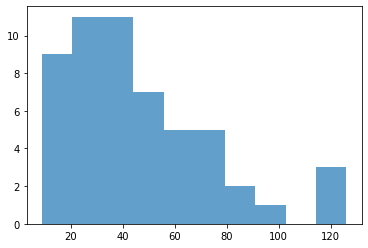

(1, 2)


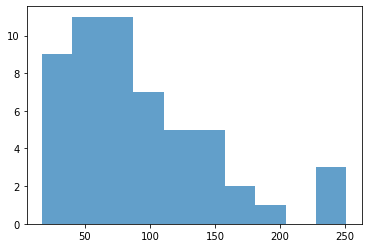

(1, 3)


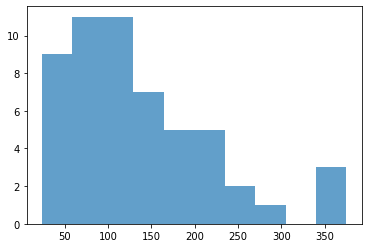

(2, 2)


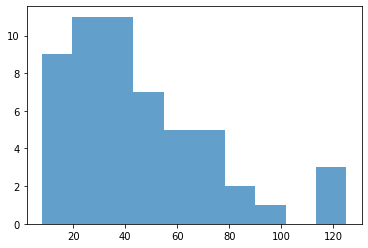

(2, 3)


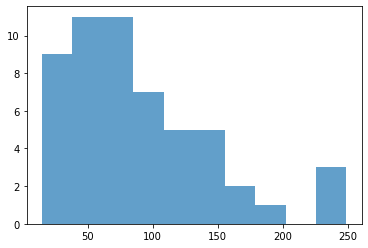

(3, 3)


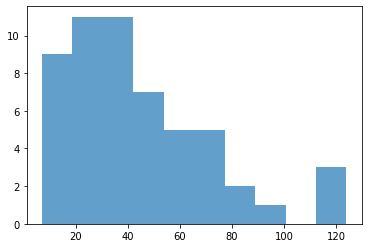

In [6]:
ngrams = [
    (1,1), # unigrams
    (1,2), # unigrams + bigrams
    (1,3), # unigrams + bigrams + trigrams
    (2,2), # bigrams
    (2,3), # bigrams + trigrams
    (3,3), # trigrams
]
summary = {}

for ng in ngrams:
    summary[ng] = get_avg_terms(ng)

In [7]:
summary

{(1, 1): {'max': 126,
  'argmax': 30,
  'min': 9,
  'argmin': 4,
  'avg': 46.77777777777778,
  'total': 2526,
  'vocab': 215,
  'sparsity': 21.757105943152453},
 (1, 2): {'max': 251,
  'argmax': 30,
  'min': 17,
  'argmin': 4,
  'avg': 92.55555555555556,
  'total': 4998,
  'vocab': 1112,
  'sparsity': 8.323341326938449},
 (1, 3): {'max': 375,
  'argmax': 30,
  'min': 24,
  'argmin': 4,
  'avg': 137.33333333333334,
  'total': 7416,
  'vocab': 2388,
  'sparsity': 5.750977107761027},
 (2, 2): {'max': 125,
  'argmax': 30,
  'min': 8,
  'argmin': 4,
  'avg': 45.77777777777778,
  'total': 2472,
  'vocab': 897,
  'sparsity': 5.103431190387712},
 (2, 3): {'max': 249,
  'argmax': 30,
  'min': 15,
  'argmin': 4,
  'avg': 90.55555555555556,
  'total': 4890,
  'vocab': 2173,
  'sparsity': 4.1673058240016365},
 (3, 3): {'max': 124,
  'argmax': 30,
  'min': 7,
  'argmin': 4,
  'avg': 44.77777777777778,
  'total': 2418,
  'vocab': 1276,
  'sparsity': 3.5092302333681644}}

## Get coherence from DB

In [8]:
%%time 
# Insert to DB
connection = psycopg2.connect(user = settings.DATABASES["default"]["USER"],
                          password = settings.DATABASES["default"]["PASSWORD"],
                          host = settings.DATABASES["default"]["HOST"],
                          port = settings.DATABASES["default"]["PORT"],
                          database = settings.DATABASES["default"]["NAME"])
connection.autocommit=True
cursor = connection.cursor()

CPU times: user 3.72 ms, sys: 461 µs, total: 4.19 ms
Wall time: 5.36 s


In [9]:
%%time
select = "SELECT model FROM EXPERIMENTS_2020_01_27 limit 10;"
cursor.execute(select)
row = cursor.fetchone()

CPU times: user 4.47 ms, sys: 59 µs, total: 4.53 ms
Wall time: 657 ms


In [16]:
base64.b64decode(row[0])

b'\x80\x03csklearn.decomposition._nmf\nNMF\nq\x00)\x81q\x01}q\x02(X\x0c\x00\x00\x00n_componentsq\x03K\x0bX\x04\x00\x00\x00initq\x04NX\x06\x00\x00\x00solverq\x05X\x02\x00\x00\x00cdq\x06X\t\x00\x00\x00beta_lossq\x07X\t\x00\x00\x00frobeniusq\x08X\x03\x00\x00\x00tolq\tG?\x1a6\xe2\xeb\x1cC-X\x08\x00\x00\x00max_iterq\nK\xc8X\x0c\x00\x00\x00random_stateq\x0b\x8a\x05\xf2vJ\xd9\x00X\x05\x00\x00\x00alphaq\x0cG\x00\x00\x00\x00\x00\x00\x00\x00X\x08\x00\x00\x00l1_ratioq\rG\x00\x00\x00\x00\x00\x00\x00\x00X\x07\x00\x00\x00verboseq\x0eK\x00X\x07\x00\x00\x00shuffleq\x0f\x89X\x13\x00\x00\x00reconstruction_err_q\x10cnumpy.core.multiarray\nscalar\nq\x11cnumpy\ndtype\nq\x12X\x02\x00\x00\x00f8q\x13K\x00K\x01\x87q\x14Rq\x15(K\x03X\x01\x00\x00\x00<q\x16NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x17bC\x08\x9b\xe8i\xad\x86\xdc\x13@q\x18\x86q\x19Rq\x1aX\r\x00\x00\x00n_components_q\x1bK\x0bX\x0b\x00\x00\x00components_q\x1ccnumpy.core.multiarray\n_reconstruct\nq\x1dcnumpy\nndarray\nq\x1eK\x00\x85q\x1fC\x01bq \x8

In [15]:
while row:
    model = pickle.loads(base64.b64decode(row[0]))
    print(model)

ModuleNotFoundError: No module named 'sklearn.decomposition._nmf'

In [86]:
cols_experiment = ['experiment_id', 'k', 'dataset', 'min_df', 'is_binary', 'vectorizer', 'ngrams', 'token', 'method', 'coherence_med5', 'coherence_med10','coherence_med15']
cols_experiment_sql = ["EXPERIMENTS_2020_01_27.%s" % item for item in cols_experiment]

select_query = '''SELECT %s FROM EXPERIMENTS_2020_01_27 where dataset like 'solution%%' order by coherence_med5 desc, coherence_med15 desc, coherence_med10 desc  '''  % ", ".join(cols_experiment_sql)

cursor.execute(select_query)
r = cursor.fetchall()

KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame(r, columns=cols_experiment)

In [ ]:
df